## Péndulo: Ángulo, aceleración y velocidad angular teórica

In [12]:
#Importamos las librerías que utilizaremos 
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

## Péndulo con ángulos pequeños: variables 

In [13]:
#Declaramos los intervalos de tiempo que vamos a tomar para el pé
dt=0.034
period_AP_1m=2.04 
period_AP_2m=2.81
times1=np.arange(0,period_AP_1m,dt)
times2=np.arange(0,period_AP_2m,dt)
n1=len(times1)
n2=len(times2)
r=2 #longitud de la cuerda en metros

In [14]:
n1

60

In [15]:
#Declaramos las condiciones iniciales
#longitud de la cuerda en metros
tetta=0.767132
w=0

#Este ciclo if identifica si el ángulo cumple la 
#aproximación de sen(theta)=theta, trabajando con una
#precisión del 98% para esta aproximación

if tetta<0.347:
    alpha=(-9.8*tetta)/r
elif tetta>0.261799:
    alpha=(-9.8*np.sin(tetta)/r)

In [16]:
#Creamos los arreglos de almacenamiento para el ángulo, velocidad y aceleración angular
tetta_array=[]
w_array=[]
alpha_array=[]

In [17]:
#Incluímos las condiciones iniciales en los arreglos
tetta_array.append(tetta)
w_array.append(w)
alpha_array.append(alpha)

In [18]:
for t in times1[1:n1]:
    tetta_temp = tetta + w*dt + (alpha*dt**2)/2
    w_temp = w + alpha*dt
    alpha_temp = (-9.8*np.sin(tetta_temp))/r
    
    w = w_temp
    tetta = tetta_temp
    alpha = alpha_temp
    
    w_array.append(w_temp)
    tetta_array.append(tetta_temp)
    alpha_array.append(alpha_temp)
    

In [19]:
def graph(periods, angular_value):
    return plt.plot(periods, angular_value)

Text(0, 0.5, 'Aceleración angular (rad/s^2)')

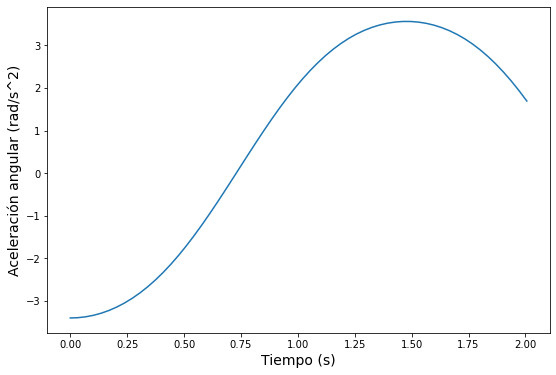

In [20]:
plt.figure(figsize=(9,6))
plt.plot(times1, alpha_array)
plt.xlabel(r'Tiempo (s)', size=14)
plt.ylabel(r'Aceleración angular (rad/s^2)', size=14)

Text(0, 0.5, 'Velocidad angular (rad/s)')

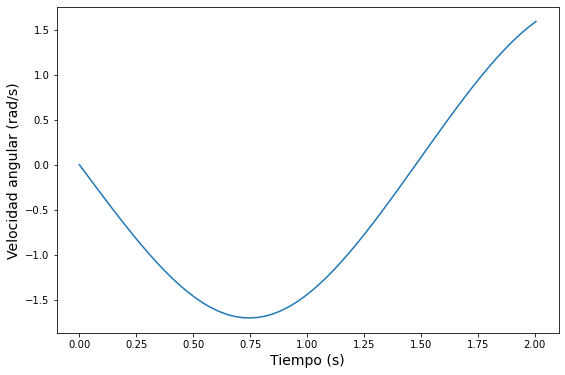

In [21]:
plt.figure(figsize=(9,6))
plt.plot(times1, w_array)
plt.xlabel(r'Tiempo (s)', size=14)
plt.ylabel(r'Velocidad angular (rad/s)', size=14)

Text(0, 0.5, 'Ángulo $\\theta$ (rad)')

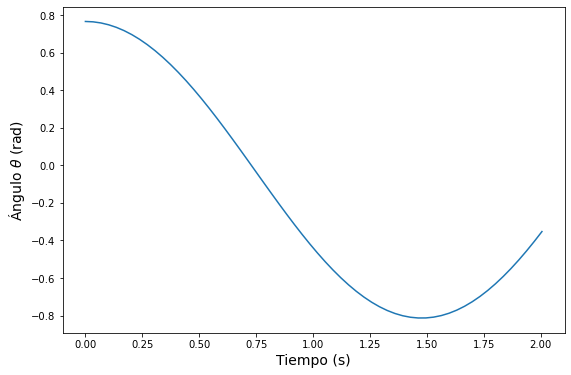

In [22]:
plt.figure(figsize=(9,6))
plt.plot(times1, tetta_array)
plt.xlabel(r'Tiempo (s)', size=14)
plt.ylabel(r'Ángulo $\theta$ (rad)', size=14)

## Péndulo: Aproximación de la gravedad con los datos experimentales

In [13]:
#Importamos los datos para masa=300g y long=1m obtenidos
#experimentalmente. Para ángulos pequeños.
AP_1_5=np.loadtxt('AP1m300g/Datos promedio 1m grados pequeños.txt',
                  delimiter='\t',skiprows=2, dtype=float, usecols=(0,1))
time_5AP = AP_1_5[:,0]
angle_5AP = AP_1_5[:,1]

In [23]:
#Este ciclo for se utiliza para hallar un valor aproximado de la serie infinita 
#de la cual depende el periodo de un péndulo.
a=0
for i in range(0,50):
        a += (sc.math.factorial(2*i) / (2**(2*i)*(sc.math.factorial(i))**2))**2*np.sin(tetta/2)**(2*i)
#Esta función recibe valores de periodo T, longitud long y ángulo tetta,
#donde identifica lo "grande" o "pequeño" del ángulo y evalúa un aproximado
#de la gravedad experimental.
def grav_exp(T, long, tetta):
    if tetta < 0.347:
        g = (4*np.pi**2*long)/(T**2)
        return g
    elif tetta > 0.347:
        g= (4*np.pi**2*long)/(T**2) * (a**2)
        return g

In [15]:
grav_exp(2.825,2, 0.0523599)

9.893565379743423

In [24]:
#Convertimos a radianes para graficar
angle_5AP=np.radians(angle_5AP)

NameError: name 'angle_5AP' is not defined

ValueError: x and y must have same first dimension, but have shapes (202,) and (281,)

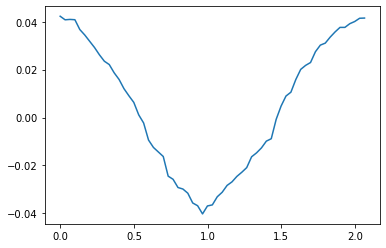

In [19]:
#Graficamos, para cada gráfica varían sus datos de periodo
#según sea su longitud y sus datos de posición angular,
#según sea su amplitud.
plt.figure.figsize=(10,8)
plt.plot(time_5AP, angle_5AP,label=r'Modelo experimental')
plt.plot(times1, tetta_array, label=r'Modelo teórico')
plt.title(r'Péndulo con L=1m y $\theta$<20', fontsize=15)
plt.xlabel(r'Tiempo (s)', fontsize=13)
plt.ylabel(r'Ángulo $\theta$ (rad)',fontsize=13)
plt.legend()

In [8]:
angle_7AP

NameError: name 'angle_7AP' is not defined

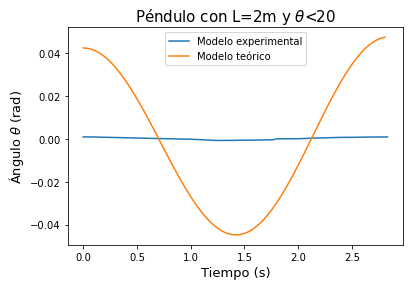

In [64]:
plt.figure.figsize=(10,8)
plt.plot(time_AP2m_aprox, angle_AP2m_aprox,label=r'Modelo experimental')
plt.plot(times2, tetta_array, label=r'Modelo teórico')
plt.title(r'Péndulo con L=2m y $\theta$<20', fontsize=15)
plt.xlabel(r'Tiempo (s)', fontsize=13)
plt.ylabel(r'Ángulo $\theta$ (rad)',fontsize=13)
plt.legend()

In [27]:
AP_2_prom=np.loadtxt('AP2M/Datos promedio longitud 2 metros grados pequeños.txt',skiprows=2,dtype=float, usecols=(0,1))
time_AP2m_aprox=AP_2_prom[:,0]
angle_AP2m_aprox=AP_2_prom[:,1]

In [28]:
angle_AP2m_aprox=np.radians(angle_AP2m_aprox)


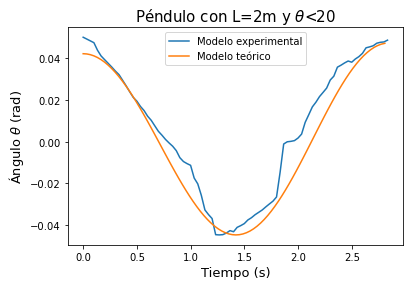

In [29]:
plt.figure.figsize=(10,8)
plt.plot(time_AP2m_aprox, angle_AP2m_aprox,label=r'Modelo experimental')
plt.plot(times2, tetta_array, label=r'Modelo teórico')
plt.title(r'Péndulo con L=2m y $\theta$<20', fontsize=15)
plt.xlabel(r'Tiempo (s)', fontsize=13)
plt.ylabel(r'Ángulo $\theta$ (rad)',fontsize=13)
plt.legend()

In [8]:
#Error cuadrático medio, se debe variar
#la variable del ángulo para cada caso.
mse = ((tetta_array - angle_AP2m_aprox )**2).mean(axis=None)

NameError: name 'angle_AP2m_aprox' is not defined

In [8]:
AG_1_prom=np.loadtxt('AG/Datos promediados para angulos grandes 2m (1).txt',skiprows=2,dtype=float, usecols=(0,1))
time_AG_1_aprox=AG_1_prom[:,0]
angle_AG_1_aprox=AG_1_prom[:,1]

In [9]:
angle_AG_1_aprox=np.radians(angle_AG_1_aprox)

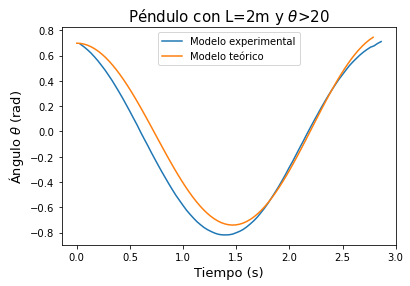

In [11]:
plt.figure.figsize=(10,8)
plt.plot(time_AG_1_aprox,angle_AG_1_aprox,label=r'Modelo experimental')
plt.plot(times2, tetta_array, label=r'Modelo teórico')
plt.title(r'Péndulo con L=2m y $\theta$>20', fontsize=15)
plt.xlabel(r'Tiempo (s)', fontsize=13)
plt.ylabel(r'Ángulo $\theta$ (rad)',fontsize=13)
plt.legend()

In [43]:
times1.shape

(62,)

In [8]:
AG_2_prom=np.loadtxt('AG/Datos promediados para angulos grandes 1m (2).txt',skiprows=2,dtype=float, usecols=(0,1))
time_AG_2_aprox=AG_2_prom[:,0]
angle_AG_2_aprox=AG_2_prom[:,1]

In [9]:
angle_AG_2_aprox=np.radians(angle_AG_2_aprox)

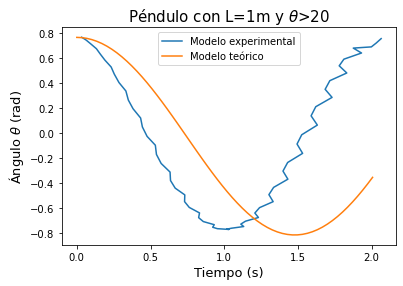

In [10]:
plt.figure.figsize=(10,8)
plt.plot(time_AG_2_aprox,angle_AG_2_aprox,label=r'Modelo experimental')
plt.plot(times1, tetta_array, label=r'Modelo teórico')
plt.title(r'Péndulo con L=1m y $\theta$>20', fontsize=15)
plt.xlabel(r'Tiempo (s)', fontsize=13)
plt.ylabel(r'Ángulo $\theta$ (rad)',fontsize=13)
plt.legend()